#  PySOQCS Example 2: CNOT circuit.

   Example of the calculation of the output of a CNOT.<br>

## Description:

<p style='text-align: justify;'> We use SOQCS to simulate a CNOT circuit as described in [1]. </p>

[1] J L O'Brien, G J Pryde, A G White, T C Ralph, D Branning <i>Demonstration of an all-optical quantum controlled-NOT gate.</i> <b> Nature 426:264</b> (2003)


## Code:

Import SOQCS and initialize the simualtor. Other libraries needed also imported.

In [1]:
import pysoqcs as soqcs
from math import acos,sqrt,pi

sim=soqcs.simulator()

### CNOT circuit

<p style='text-align: justify;'> CNOT circuit declaration. <br> </p>

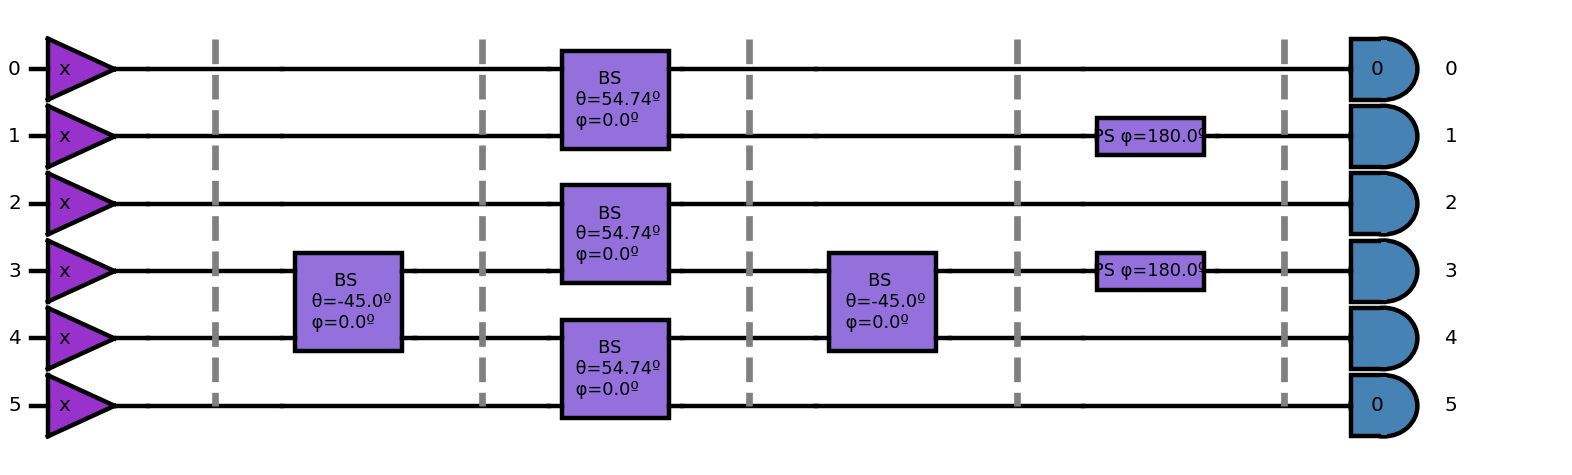

In [2]:
cnot = soqcs.qodev(2,6);
cnot.open_channel(0)
cnot.open_channel(1)
cnot.open_channel(2)
cnot.open_channel(3)
cnot.open_channel(4)
cnot.open_channel(5)
cnot.separator()
cnot.beamsplitter(3,4, -45.0,0.0)
cnot.separator()
cnot.beamsplitter(0,1,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.beamsplitter(2,3,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.beamsplitter(4,5,180*acos(1.0/sqrt(3.0))/pi,0.0)
cnot.separator()
cnot.beamsplitter(3,4, -45.0,0.0)
cnot.separator()
cnot.phase_shifter(1, 180)
cnot.phase_shifter(3, 180)
cnot.separator()
cnot .detector(0,0)
cnot.detector(1)
cnot.detector(2)
cnot.detector(3)
cnot.detector(4)
cnot.detector(5,0)
cnot.show(sizexy=80,depth=13)

### Input declaration

In this case we will define the input assigning to the circuit the intended qubit values. Qubit representation is then translated into a path encoded photon initialization. First, we need to define the qubit - photon channel correspondence:

In [3]:
qmap=[[1, 3],
      [2, 4]]

### Example with | 1, 0 > input.

Circuit with the input photons definition.

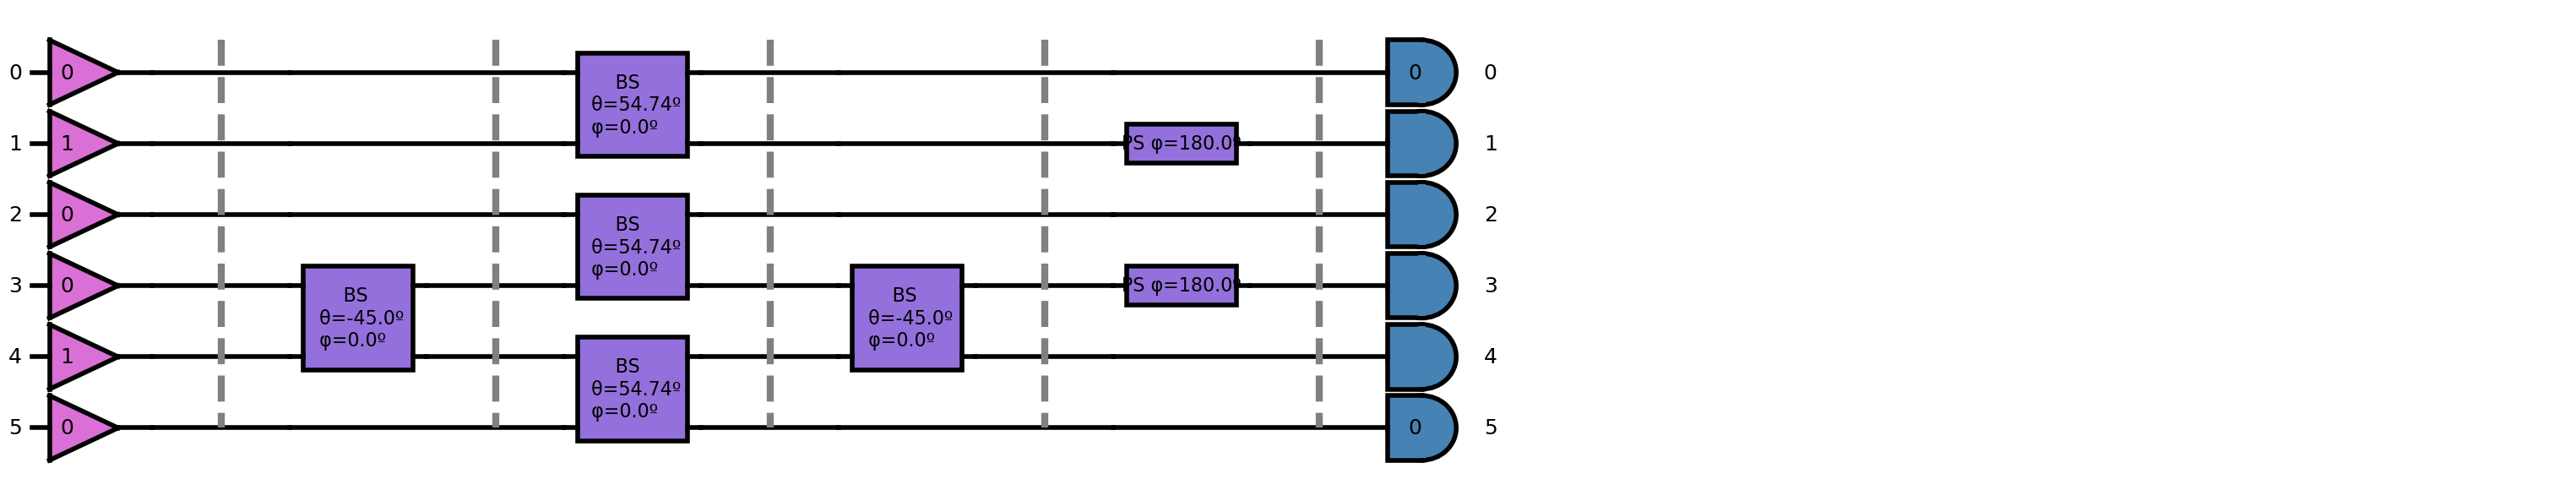

In [4]:
cnot10=soqcs.qodev(2,6);        # Create a circuit
cnot10.qubits([1,0],[0,0],qmap) # Define the input
cnot10 << cnot                  # Append the gates
cnot10.show(depth=20,slin=1)    # Show the resulting circuit.

Simulation and plot of the output.

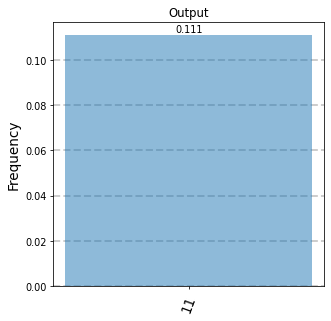

In [5]:
outcome=sim.run(cnot10)
encoded=outcome.translate(qmap, cnot10)
encoded.show(sizex=5,dpi=70)

## Additional results

### |0, 0 > input

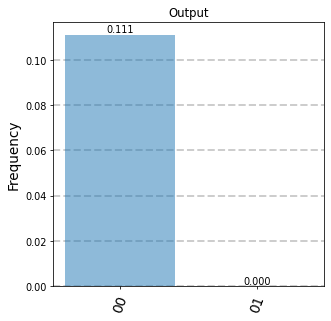

In [6]:
cnot00=soqcs.qodev(2,6);  
cnot00.qubits([0,0],[0,0],qmap) 
cnot00 << cnot            
outcome=sim.run(cnot00)
encoded=outcome.translate(qmap, cnot10)
encoded.show(sizex=5,dpi=70)

### |0, 1 > input

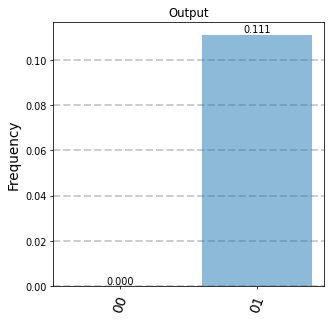

In [7]:
cnot01=soqcs.qodev(2,6);  
cnot01.qubits([0,1],[0,0],qmap) 
cnot01 << cnot            
outcome=sim.run(cnot01)
encoded=outcome.translate(qmap, cnot10)
encoded.show(sizex=5,dpi=70)

### |1, 1 > input

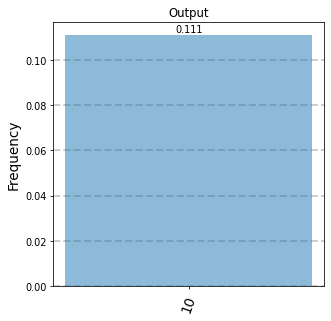

In [8]:
cnot11=soqcs.qodev(2,6);  
cnot11.qubits([1,1],[0,0],qmap) 
cnot11 << cnot            
outcome=sim.run(cnot11)
encoded=outcome.translate(qmap, cnot10)
encoded.show(sizex=5,dpi=70)

<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>